<a href="https://colab.research.google.com/github/kategavrishina/func_models/blob/main/func_models_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[2 балла] Выберите экспрессив и покажите, что это действительно экспрессив. Какой профиль Вы можете предположить для приведенного экспрессива -- U-образный, J-образный, перевернутое U или что-то другое? Какие примеры подкрепляют Ваше предположение?

[2 балла] Создайте корпус с контекстами, содержащими Ваш экспрессив, и с разметкой, например, от 1 до 5 звездочек. Разметка по экспрессивности может быть и другой, но хорошо иметь не меньше трёх уровней разметки. Ваш корпус может быть подкорпусом существующего датасета.

[2 балла] Создайте профиль экспрессива по формуле из работы Constant et al. 2009.

[1 балл] Подберите для данных регрессионную модель. Прокомментируйте.

[3 балла] Какой профиль получился -- U-образный, J-образный, перевернутое U или что-то другое? Проиллюстрируйте распределение примерами. Подтвердилась ли изначальная гипотеза? Есть ли среди корпусных данных неожиданные и интересные случаи?

**Задание 1.**

####Экспрессив: *freaking*

**Почему это экспрессив?**
1. Проблемы с переводом. На русский обычно переводится как "чертовски" или "до\*\*анный", в английском, как я поняла, возникло по аналогии с *fu**ing* и *frigging*, которые значат примерно то же. Буквального перевода у слова, можно сказать, нет, по крайней мере такого, который бы подходил к контексту. + В словарях не представлен перевод, а только описана функция (to emphasize what is being said, or to express anger/used as an intensive).
2. Эффект усиляется при повторении (не подряд, но в целом в предложении): 

> With a really quite commendable effort of will, Fred restrains his impulse to utter some exasperated imprecation and snatch the *freaking* mouse from his *freaking* partner to *freaking* click on Fast *Freaking* Forward …

3. Если сравнивать высказывания с экспрессивом и без, первые выражают гораздо большую интенсивность и спектр эмоций: 

> I said she was freaking insane. **VS** I said she was insane.

4. В нейтральных контекстах можно заменить на *very*, которое эмоционально не окрашено.

**Какой профиль?**

Предполагаю, что профиль будет U-образный, так как этот экспрессив может употребляться как с положительной оценкой (*freaking awesome, freaking good*), так и с отрицательными эмоциями (*freaking starving, freaking hell*). Я сама чаще встречала это слово в положительных контекстах. Кстати в русском языке схожее поведение должно быть у слова "чертовски" (чертовски красива vs чертовски голодна).




In [91]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

import matplotlib.pyplot as plt
import math

import random
import numpy as np
from tqdm import tqdm_notebook as tqdm
from collections import defaultdict
from nltk.tokenize import word_tokenize

**Задание 2**

Корпус Amazon Review Data, раздел "Фильмы и ТВ"

https://nijianmo.github.io/amazon/index.html

Оценки от 1 до 5

**Подкорпус:** все отзывы, в которых есть хотя бы одно вхождение экспрессива *freaking*.

In [2]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Movies_and_TV_5.json.gz

--2021-10-10 16:42:58--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Movies_and_TV_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791322468 (755M) [application/octet-stream]
Saving to: ‘Movies_and_TV_5.json.gz’

Movies_and_TV_5.jso 100%[===================>] 754.66M  42.2MB/s    in 18s     

2021-10-10 16:43:16 (40.9 MB/s) - ‘Movies_and_TV_5.json.gz’ saved [791322468/791322468]



In [3]:
### load the meta data

data = []
with gzip.open('Movies_and_TV_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

3410019
{'overall': 5.0, 'verified': True, 'reviewTime': '11 9, 2012', 'reviewerID': 'A2M1CU2IRZG0K9', 'asin': '0005089549', 'style': {'Format:': ' VHS Tape'}, 'reviewerName': 'Terri', 'reviewText': "So sorry I didn't purchase this years ago when it first came out!!  This is very good and entertaining!  We absolutely loved it and anticipate seeing it repeatedly.  We actually wore out the cassette years back, so we also purchased this same product on cd.  Best purchase we made out of all!  Would purchase on dvd if we could find one.", 'summary': 'Amazing!', 'unixReviewTime': 1352419200}


In [4]:
# convert list into pandas dataframe

df = pd.DataFrame.from_dict(data)

print(len(df))

3410019


In [5]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN


In [6]:
# оставляем только важные для нас признаки
df = df[['overall', 'reviewText']]

In [7]:
df.dropna(inplace=True)

In [82]:
word = "freaking"

In [83]:
count = 0
for text in df.reviewText:
    if word in text:
        count += 1

In [84]:
count # количество отзывов с искомым экспрессивом

1889

In [88]:
# создание подкорпуса
little_corpus = df[df['reviewText'].str.contains(word)].reset_index(drop=True)

In [89]:
little_corpus.head()

,overall,reviewText
0,5.0,No close captions! No subtilies! pissing me of...
1,4.0,IDLE HANDS is a movie that I remember always b...
2,4.0,Wow! I can't recall the last time I saw so man...
3,2.0,Saw Resident Evil 2. Without going into FULL d...
4,5.0,the visuals rock. it is very scary. the music ...


In [90]:
little_corpus.to_csv("freaking_corpus.csv")

**Задание 3**

Формула (для каждой оценки X):

y = ln(количество вхождений экспрессива в корпусе / (количество слов в корпусе длиной, равной длине экспрессива -- количество вхождений экспрессива в корпусе))



In [50]:
c = {5: [0, 0], 4: [0, 0], 3: [0, 0], 2: [0, 0], 1: [0, 0]}

In [51]:
len_word = len(word)

In [52]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [53]:
for key in c.keys():
    data = little_corpus[little_corpus["overall"] == key]
    all_words = 0
    exp_words = 0
    for text in data.reviewText:
        tokens = word_tokenize(text)
        words = [w for w in tokens if w.isalpha()]
        for w in words:
            if len(w) == len_word:
                if w == word:
                    exp_words += 1
                else:
                    all_words += 1
    c[int(key)] = [exp_words, all_words]

In [99]:
c

{1: [2257, 109684],
 2: [2955, 140340],
 3: [5679, 270580],
 4: [12276, 497269],
 5: [23712, 854654]}

In [55]:
import math

In [56]:
data_dict = {}
for key in c.keys():
    data_dict[key] = math.log(c[key][0] / (c[key][1] - c[key][0]))

**Задание 4**

Регрессионная модель потребовалась квадратичная, так как профиль экспрессива U-образный - частота вхождений увеличивается в отзывах с оценкой 1 и 5 (в полярных контекстах). Линейная регрессия, как видно на графике, не подходит.

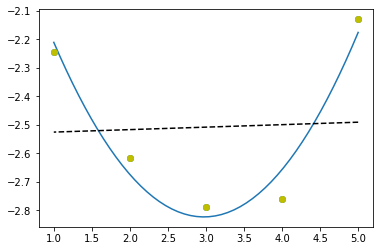

In [66]:
x = list(data_dict.keys())
y = list(data_dict.values())
# значения переменных
plt.scatter(x, y)

# квадратичная регрессия
mymodel = np.poly1d(np.polyfit(x, y, 2))
myline = np.linspace(1, 5)

plt.plot(myline, mymodel(myline))

# линейная регрессия
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.show()

**Задание 5**

Профиль экспрессива U-образный, гипотеза подтвердилась. Даже, можно сказать, подтвердился мой опыт, связанный с тем, что я раньше встречала только положительные контексты с рассматриваемым словом - частота вхождений в положительных отзывах выше, чем в отрицательных.



Примеры для всех классов. Можно заметить, что довольно часто экспрессив относится не к оценке "продукта" (фильма), а к героям, сюжету или эмоциям автора. Кроме того, встречается выражение "freaking out" (фразовый глагол "психовать"), которое могло бы испортить эксперимент, но оно встречается во всех пяти разных рейтингах, так что будем считать, что оно не помешало исследованию, так как мы смотрим не на абсолютные числа, а на относительные соотношения.

In [106]:
from termcolor import colored
print(colored('hello', 'red'), colored('world', 'green'))
print(colored("hello red world", 'red'))

hello world
hello red world


In [112]:
for key in c:
    print(colored(f"\nОценка {key}", "green"))
    texts = little_corpus[little_corpus['overall'] == key]['reviewText'].sample(5)
    for text in texts:
        text = text.split(word)
        print(' '.join([text[0][-100:], colored(word, "red"), text[1][:100]]))


Оценка 5
times.  it was better than i expected. i think  everyone should watch it plus michelle rodriguez is  freaking  hott.
ren Oates, Loretta Swit and Lara Parker.  If what happened to these people, happened to me.. I'd be  freaking  out.  Like Deliverance, it's go out to the country for a trip... bad things happen.
Lara's characte
 pretty blond girl Jennifer's friend in the end there is a plot twist with her you'll love and it's  freaking  awesome, when I saw it I was like OMG sweet this is epic
is equally as amazing, if not better. Sorry creators, for not catching on sooner. Anyway, it'is fan- freaking -tastic. 10 Stars.
the Indian warrior who bounty hunter learns the truth

5 As they say the crap hits the fan when the  freaking  zombies start popping up. This little gem has minimal blood and gore and the film plot and characte

Оценка 4
 forest, at night, is a scary place.  Especially when you're lost!  So, yeah, I can totally imagine  freaking  out if while lost I seemed to be 

**Мне захотелось из любопытства посмотреть на распределение слова "very", которое можно считать нейтральной заменой экспрессива *freaking*.**

In [67]:
word = "very"

In [68]:
count = 0
for text in df.reviewText:
    if word in text:
        count += 1

In [69]:
count

726413

In [70]:
little_corpus = df[df['reviewText'].str.contains(word)].sample(50000).reset_index()

In [71]:
c = {5: [0, 0], 4: [0, 0], 3: [0, 0], 2: [0, 0], 1: [0, 0]}

In [72]:
len_word = len(word)

In [73]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
for key in c.keys():
    data = little_corpus[little_corpus["overall"] == key]
    all_words = 0
    exp_words = 0
    for text in data.reviewText:
        tokens = word_tokenize(text)
        words = [w for w in tokens if w.isalpha()]
        for w in words:
            if len(w) == len_word:
                if w == word:
                    exp_words += 1
                else:
                    all_words += 1
    c[key] = [exp_words, all_words]

In [75]:
c

{1: [2257, 109684],
 2: [2955, 140340],
 3: [5679, 270580],
 4: [12276, 497269],
 5: [23712, 854654]}

In [76]:
import math

In [77]:
data_dict = {}
for key in c.keys():
    data_dict[key] = math.log(c[key][0]/(c[key][1]-c[key][0]))

In [79]:
import matplotlib.pyplot as plt

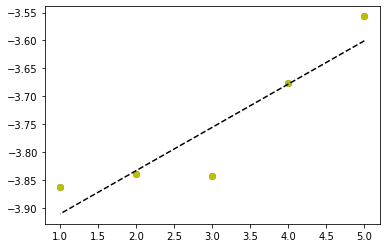

In [81]:
x = list(data_dict.keys())
y = list(data_dict.values())
# значения переменных
plt.scatter(x, y)

# линейная регрессия
coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.show()

Я не ожидала, что распределение будет настолько ярким. Видимо, люди, пишущие положительные отзывы, очень эмоциональны и любят преувеличивать свои впечатления + легче всего использовать для усиления выражения своих эмоций простое слово "very", чем какую-то более сложную и специфичную лексику.

Я думала, что графики всё-таки будут похожи друг на друга (так как very можно использовать и для выражения сильных негативных эмоций), но, похоже, freaking к этому склонно гораздо сильнее.

И ещё, судя по примерам, определение из кембриджского словаря "used to emphasize what is being said, or to express anger" не совсем верно, так как встречаются контексты, в которых экспрессив относится к словам, которые по семантике не могут быть "усилены" и не связаны со злостью. Например:



> As they say the crap hits the fan when the  freaking  zombies start popping up.

Я понимаю, что здесь, видимо, усиливается сам факт впечатления от зомби (страх?), но явно не сами герои происходящего. Можно сказать, что им скорее придается лишний устрашающий эффект.
